<a href="https://colab.research.google.com/github/GundekariYeshashwini/SML_2303A52023/blob/main/ASSIGNMENT%2012.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/archive.zip'
data = pd.read_csv(file_path)

# Display the first few rows to understand the structure of the data
data.head(), data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 334 non-null    int64  
 1   Gender              334 non-null    object 
 2   Protein1            334 non-null    float64
 3   Protein2            334 non-null    float64
 4   Protein3            334 non-null    float64
 5   Protein4            334 non-null    float64
 6   Tumour_Stage        334 non-null    object 
 7   Histology           334 non-null    object 
 8   ER status           334 non-null    object 
 9   PR status           334 non-null    object 
 10  HER2 status         334 non-null    object 
 11  Surgery_type        334 non-null    object 
 12  Date_of_Surgery     334 non-null    object 
 13  Date_of_Last_Visit  317 non-null    object 
 14  Patient_Status      321 non-null    object 
dtypes: float64(4), int64(1), object(10)
memory usage: 39.3+ K

(   Age  Gender  Protein1  Protein2  Protein3  Protein4 Tumour_Stage  \
 0   42  FEMALE   0.95256   2.15000  0.007972 -0.048340           II   
 1   54  FEMALE   0.00000   1.38020 -0.498030 -0.507320           II   
 2   63  FEMALE  -0.52303   1.76400 -0.370190  0.010815           II   
 3   78  FEMALE  -0.87618   0.12943 -0.370380  0.132190            I   
 4   42  FEMALE   0.22611   1.74910 -0.543970 -0.390210           II   
 
                        Histology ER status PR status HER2 status Surgery_type  \
 0  Infiltrating Ductal Carcinoma  Positive  Positive    Negative        Other   
 1  Infiltrating Ductal Carcinoma  Positive  Positive    Negative        Other   
 2  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   Lumpectomy   
 3  Infiltrating Ductal Carcinoma  Positive  Positive    Negative        Other   
 4  Infiltrating Ductal Carcinoma  Positive  Positive    Positive   Lumpectomy   
 
   Date_of_Surgery Date_of_Last_Visit Patient_Status  
 0       20-May-1

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Drop irrelevant columns
columns_to_drop = ["Date_of_Surgery", "Date_of_Last_Visit"]
data_cleaned = data.drop(columns=columns_to_drop)

# Drop rows with missing target values (Patient_Status)
data_cleaned = data_cleaned.dropna(subset=["Patient_Status"])

# Encode categorical variables
categorical_columns = ["Gender", "Tumour_Stage", "Histology", "ER status", "PR status", "HER2 status", "Surgery_type", "Patient_Status"]
label_encoders = {col: LabelEncoder() for col in categorical_columns}

for col in categorical_columns:
    data_cleaned[col] = label_encoders[col].fit_transform(data_cleaned[col])

# Define features and target variable
X = data_cleaned.drop(columns=["Patient_Status"])
y = data_cleaned["Patient_Status"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the processed dataset
X_train.head(), y_train.head()


(     Age  Gender  Protein1  Protein2  Protein3  Protein4  Tumour_Stage  \
 183   44       0  0.239170   0.45290  0.040158 -0.384790             1   
 19    61       0 -1.487200   0.34903 -0.662420  0.185280             1   
 26    65       0 -0.002021   0.81402 -0.331550 -0.062663             1   
 179   79       0  0.479400   2.05590 -0.531360 -0.188480             0   
 113   59       0  0.150500   1.26740  0.642650  0.261420             1   
 
      Histology  ER status  PR status  HER2 status  Surgery_type  
 183          0          0          0            0             3  
 19           0          0          0            0             2  
 26           1          0          0            0             2  
 179          0          0          0            1             0  
 113          0          0          0            0             3  ,
 183    0
 19     0
 26     1
 179    1
 113    0
 Name: Patient_Status, dtype: int64)

In [4]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize models
svm_model = SVC(random_state=42)
knn_model = KNeighborsClassifier()
logreg_model = LogisticRegression(random_state=42, max_iter=1000)

# Train models
svm_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
logreg_model.fit(X_train, y_train)

# Predictions
svm_predictions = svm_model.predict(X_test)
knn_predictions = knn_model.predict(X_test)
logreg_predictions = logreg_model.predict(X_test)

# Accuracy scores
svm_accuracy = accuracy_score(y_test, svm_predictions)
knn_accuracy = accuracy_score(y_test, knn_predictions)
logreg_accuracy = accuracy_score(y_test, logreg_predictions)

svm_accuracy, knn_accuracy, logreg_accuracy


(0.7692307692307693, 0.7538461538461538, 0.7692307692307693)

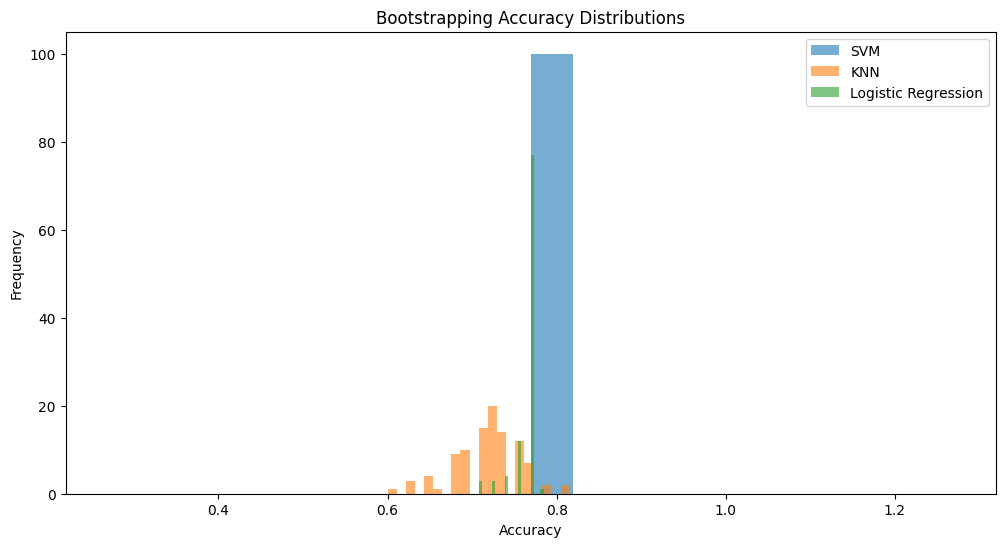

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Function for bootstrapping
def bootstrap_accuracy(model, X, y, n_iterations=100):
    bootstrapped_accuracies = []
    n_samples = len(y)
    for _ in range(n_iterations):
        # Generate a random sample with replacement
        indices = np.random.choice(range(n_samples), size=n_samples, replace=True)
        X_sample = X.iloc[indices]
        y_sample = y.iloc[indices]

        # Train and evaluate the model
        model.fit(X_sample, y_sample)
        predictions = model.predict(X_test)
        acc = accuracy_score(y_test, predictions)
        bootstrapped_accuracies.append(acc)

    return bootstrapped_accuracies

# Perform bootstrapping for each model
svm_bootstrap = bootstrap_accuracy(svm_model, X_train, y_train)
knn_bootstrap = bootstrap_accuracy(knn_model, X_train, y_train)
logreg_bootstrap = bootstrap_accuracy(logreg_model, X_train, y_train)

# Plot bootstrapping results
plt.figure(figsize=(12, 6))
plt.hist(svm_bootstrap, bins=20, alpha=0.6, label='SVM')
plt.hist(knn_bootstrap, bins=20, alpha=0.6, label='KNN')
plt.hist(logreg_bootstrap, bins=20, alpha=0.6, label='Logistic Regression')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title('Bootstrapping Accuracy Distributions')
plt.legend()
plt.show()

In [6]:
# Load the newly uploaded dataset
file_path_bootstrap = '/content/drive/MyDrive/archive.zip'
data_bootstrap = pd.read_csv(file_path_bootstrap)

# Display the first few rows and info of the dataset to understand its structure
data_bootstrap.head(), data_bootstrap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 334 non-null    int64  
 1   Gender              334 non-null    object 
 2   Protein1            334 non-null    float64
 3   Protein2            334 non-null    float64
 4   Protein3            334 non-null    float64
 5   Protein4            334 non-null    float64
 6   Tumour_Stage        334 non-null    object 
 7   Histology           334 non-null    object 
 8   ER status           334 non-null    object 
 9   PR status           334 non-null    object 
 10  HER2 status         334 non-null    object 
 11  Surgery_type        334 non-null    object 
 12  Date_of_Surgery     334 non-null    object 
 13  Date_of_Last_Visit  317 non-null    object 
 14  Patient_Status      321 non-null    object 
dtypes: float64(4), int64(1), object(10)
memory usage: 39.3+ K

(   Age  Gender  Protein1  Protein2  Protein3  Protein4 Tumour_Stage  \
 0   42  FEMALE   0.95256   2.15000  0.007972 -0.048340           II   
 1   54  FEMALE   0.00000   1.38020 -0.498030 -0.507320           II   
 2   63  FEMALE  -0.52303   1.76400 -0.370190  0.010815           II   
 3   78  FEMALE  -0.87618   0.12943 -0.370380  0.132190            I   
 4   42  FEMALE   0.22611   1.74910 -0.543970 -0.390210           II   
 
                        Histology ER status PR status HER2 status Surgery_type  \
 0  Infiltrating Ductal Carcinoma  Positive  Positive    Negative        Other   
 1  Infiltrating Ductal Carcinoma  Positive  Positive    Negative        Other   
 2  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   Lumpectomy   
 3  Infiltrating Ductal Carcinoma  Positive  Positive    Negative        Other   
 4  Infiltrating Ductal Carcinoma  Positive  Positive    Positive   Lumpectomy   
 
   Date_of_Surgery Date_of_Last_Visit Patient_Status  
 0       20-May-1